# EasyLens worksheet

## this is a quick an'durty notebook to model strong lenses in multiband survey data

### import modules

In [1]:
# external modules
import astropy.io.fits as pyfits
import astropy.wcs as pywcs
import pickle
import numpy as np
import os
import easylens

# required is the QSLens module, available here: https://....
from easylens.Data.lens_system import LensSystem
from easylens.Data.show_lens import ShowLens
from easylens.Data.exposure import Exposure
import easylens.util as util


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
#import seaborn as sns

/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### initialize lens system class

In [2]:

# this class contains all the information of the lens system
# as a primary input, you need to assign a name and coordiantes

# comment: in this version, the coordinates are read out of an image cutout
path2image = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/g/cutouts/DESJ033056.9318-522813.0188_g.fits'
ra_center, dec_center = util.get_ra_dec_center(path2image)



lensSystem = LensSystem(name="object03", ra=ra_center, dec=dec_center)

RADECSYS is non-standard, use RADESYSa.


RADECSYS is non-standard, use RADESYSa. [astropy.wcs.wcs]


### add exposures

In [3]:

# each exposure must come along with a weight image and a psf image. The class Exposure merges these informations
# together in one single class

#TODO: this should be automatised and adjusted to how we access the DES data and format.
# At the moment, there are local paths assigned.

#g-band
exposure_g = Exposure(lensSystem.ra, lensSystem.dec)
g_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/g/cutouts/DESJ033056.9318-522813.0188_g.fits'
g_psf_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/g/cutouts/psf_g.fits'
g_weight_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/g/cutouts/DESJ033056.9318-522813.0188_weight_g.fits'
exposure_g.load_all(g_path, g_psf_path, g_weight_path)
lensSystem.add_image_data(exposure_g, "g_band")

#r-band
exposure_r = Exposure(lensSystem.ra, lensSystem.dec)
r_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/r/cutouts/DESJ033056.9318-522813.0188_r.fits'
r_psf_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/r/cutouts/psf_r.fits'
r_weight_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/r/cutouts/DESJ033056.9318-522813.0188_weight_r.fits'
exposure_r.load_all(r_path, r_psf_path, r_weight_path)
lensSystem.add_image_data(exposure_r, "r_band")

#i-band
exposure_i = Exposure(lensSystem.ra, lensSystem.dec)
i_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/i/cutouts/DESJ033056.9318-522813.0188_i.fits'
i_psf_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/i/cutouts/psf_i.fits'
i_weight_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/i/cutouts/DESJ033056.9318-522813.0188_weight_i.fits'
exposure_i.load_all(i_path, i_psf_path, i_weight_path)
lensSystem.add_image_data(exposure_i, "i_band")

#Y-band
exposure_Y = Exposure(lensSystem.ra, lensSystem.dec)
Y_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/Y/cutouts/DESJ033056.9318-522813.0188_Y.fits'
Y_psf_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/Y/cutouts/psf_Y.fits'
Y_weight_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/Y/cutouts/DESJ033056.9318-522813.0188_weight_Y.fits'
exposure_Y.load_all(Y_path, Y_psf_path, Y_weight_path)
lensSystem.add_image_data(exposure_Y, "Y_band")

#z-band
exposure_z = Exposure(lensSystem.ra, lensSystem.dec)
z_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/z/cutouts/DESJ033056.9318-522813.0188_z.fits'
z_psf_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/z/cutouts/psf_z.fits'
z_weight_path = '/Users/sibirrer/Desktop/sva1_lensing/object_07/y1/z/cutouts/DESJ033056.9318-522813.0188_weight_z.fits'
exposure_z.load_all(z_path, z_psf_path, z_weight_path)
lensSystem.add_image_data(exposure_z, "z_band")


No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-10-28T06:36:09.476''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-09-13T09:27:55.306''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-11-11T03:15:13.571''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-11-14T04:46:19.291''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config


### show images

/Users/sibirrer/Cosmology/Software/EasyLens/easylens/Data/show_lens.py:43: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image*mask), origin='lower')#, extent=[0, deltaPix*numPix, 0, deltaPix*numPix])
/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


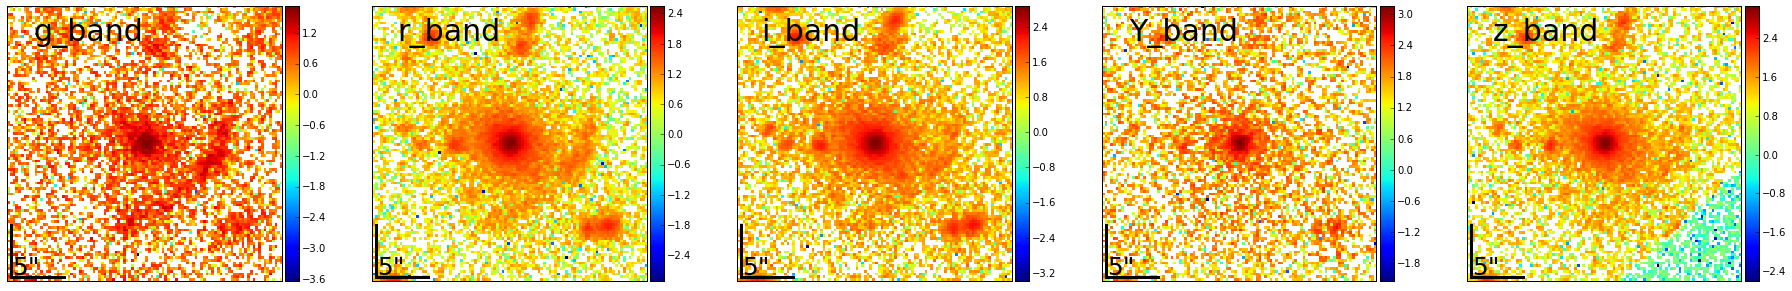

In [4]:
showLens = ShowLens(lensSystem)

f, axes = showLens.show_images()
plt.show()

### assign masks for different objects

/Users/sibirrer/Cosmology/Software/EasyLens/easylens/Data/show_lens.py:43: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(image*mask), origin='lower')#, extent=[0, deltaPix*numPix, 0, deltaPix*numPix])


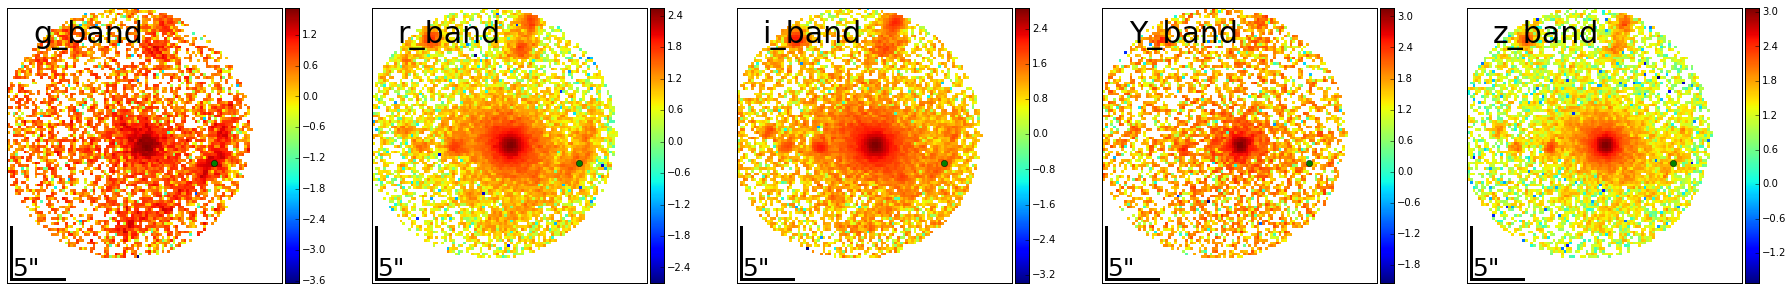

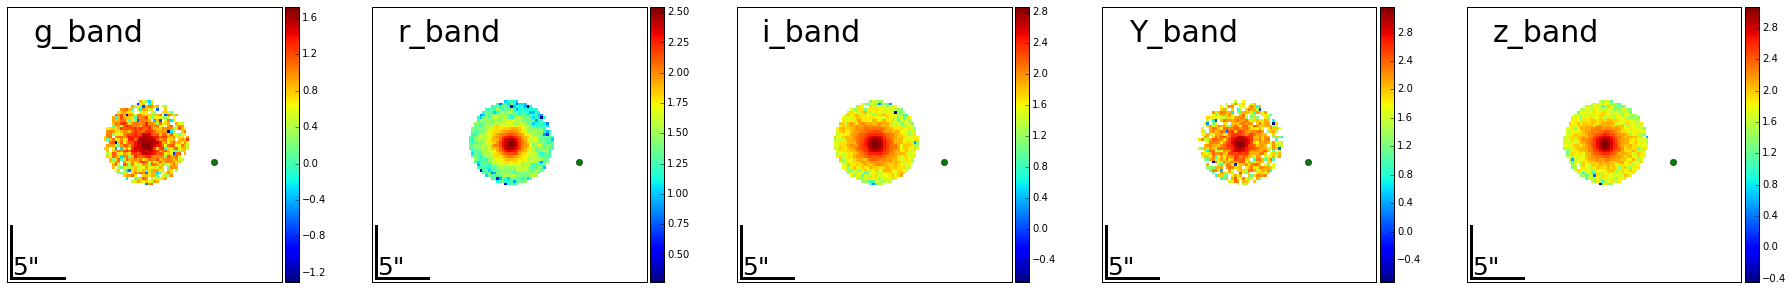

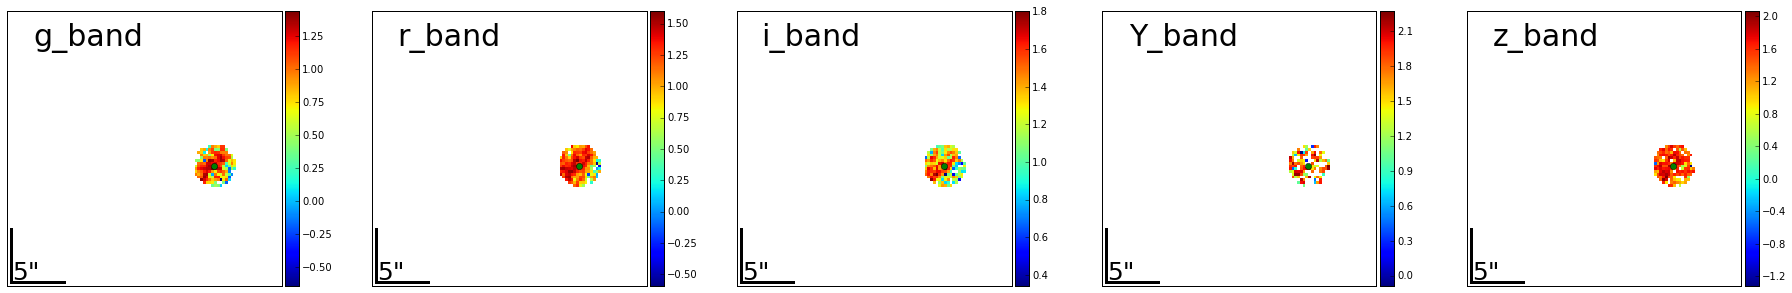

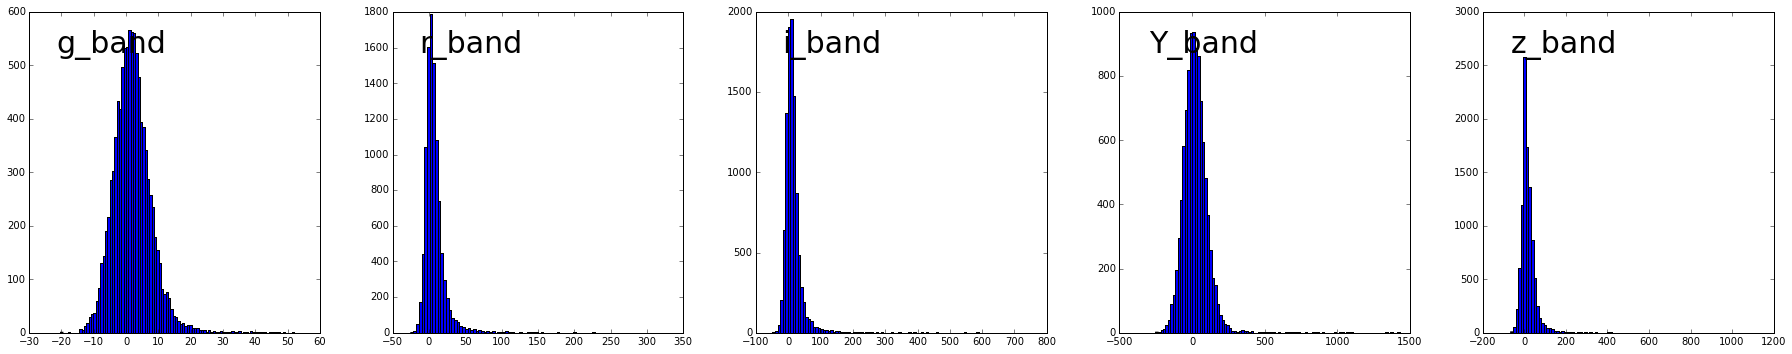

In [5]:
ra_pos_2 = -6.5
dec_pos_2 = -1.8
kwargs_mask = {"type": "circular", "ra_c": 2, "dec_c": 1, "width": 10, "radius": 12}
kwargs_mask_source1 = {"type": "circular", "ra_c": 0, "dec_c": 0, "width": 10, "radius": 4}
kwargs_mask_source2 = {"type": "circular", "ra_c": ra_pos_2, "dec_c": dec_pos_2, "width": 10, "radius": 2}



f, axes = showLens.show_images(ra_pos_2, dec_pos_2, kwargs_mask)
plt.show()

f, axes = showLens.show_images(ra_pos_2, dec_pos_2, kwargs_mask_source1)
plt.show()

f, axes = showLens.show_images(ra_pos_2, dec_pos_2, kwargs_mask_source2)
plt.show()

f, axes = showLens.show_pixel_hist()
plt.show()

In [6]:
from easylens.easylens import EasyLens
easyLens = EasyLens(lensSystem, frame_bool = {"g_band": True, "r_band": True, "i_band": True,
            "Y_band": True, "z_band": True}, subgrid_res=2)

w_SED1 = lensSystem.get_sed_estimate(ra_pos=0, dec_pos=0)
w_SED2 = lensSystem.get_sed_estimate(ra_pos_2, dec_pos_2)
print w_SED1, w_SED2
from easylens.easylens import Source

{'g_band': 15.265325, 'r_band': 82.567078, 'Y_band': 248.59315, 'z_band': 219.81477, 'i_band': 156.2663} {'g_band': 6.9567842, 'r_band': 13.53226, 'Y_band': 27.703051, 'z_band': 29.379051, 'i_band': 19.896832}


### SED modeling of source 1 (primary the lensing galaxy)

/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:262: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  image_un_convolve += source.get_lensed_unconvolved(param_array[num:num+numParam], ra_grid, dec_grid, frame, self._kwargs_lens, mask=mask)
/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:288: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  source_image = source.get_unconvolved(param_array[num:num+numParam], ra_grid, dec_grid, frame, self._kwargs_lens, mask=mask)


source with name source1 added
source with name source2 not found
source with name source1 deleted
source with name source1 added
0
3.36469804312
residual images


/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:202: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  param = param_array[num:num+numParam]


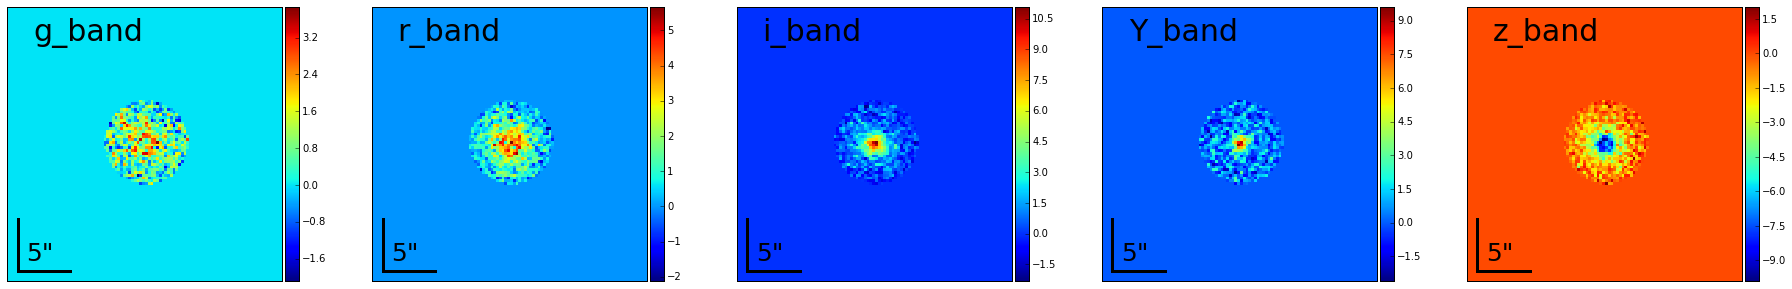

sources


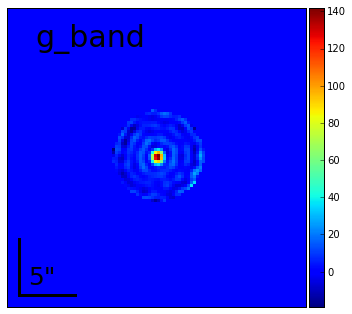

In [7]:
ra_pos_1 = 0
dec_pos_1 = 0
beta_1 = 1.5
n_max_1 = 20

source1 = Source(name="source1", ra_pos=ra_pos_1, dec_pos=dec_pos_1, beta=beta_1, n_max=n_max_1, w_SED=w_SED1, lens_bool=False)
easyLens.add_source(source1, over_write=True)
easyLens.del_source("source2")
easyLens.update_mask(kwargs_mask_source1)
numPix = easyLens.get_pixels_unmasked()
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()

for i in range(1):
    A = easyLens.get_response()
    param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

    data_list = easyLens.get_data_list()
    model_list = easyLens.get_model_images(model_array)
    residual_list = easyLens.get_residuals(model_array)
    de_convolved_list = easyLens.get_deconvolved(param_array)
    source_list_g = easyLens.get_sources_original(param_array, "g_band")    
    
    A_sed = easyLens.get_response_sed(param_array)
    param_sed_array, model_sed_array = easyLens.get_inverted(A_sed, C_D_inv, d)
    w_SED1 = {'g_band': param_sed_array[0], 'r_band': param_sed_array[1], 'i_band': param_sed_array[2], 'Y_band': param_sed_array[3], 'z_band': param_sed_array[4]}
    source1 = Source(name="source1", ra_pos=ra_pos_1, dec_pos=dec_pos_1, beta=beta_1, n_max=n_max_1, w_SED=w_SED1, lens_bool=False)
    easyLens.add_source(source1, over_write=True)


frame_list = easyLens.frame_list
print i
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2
# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
plt.show()

# sources separate
print("sources")
f, axes = showLens.show_list(source_list_g, ["g_band"])
plt.show()

### SED modeling of source 2 (primary the source galaxy)

source with name source1 deleted
source with name source1 added
source with name source2 not found
source with name source2 added
source with name source2 deleted
source with name source2 added
source with name source2 deleted
source with name source2 added
2
1.02751912661
residual images


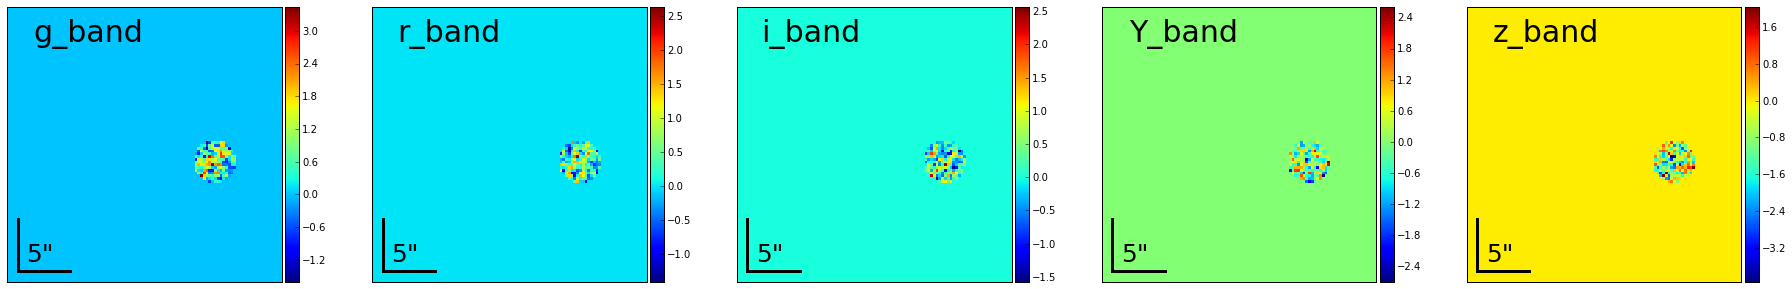

sources


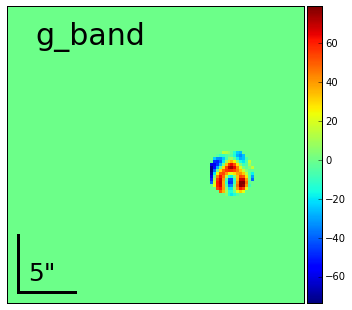

In [8]:
ra_pos_2 = ra_pos_2
dec_pos_2 = dec_pos_2
beta_2 = 1.
n_max_2 = 5

source2 = Source(name="source1", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=beta_2, n_max=n_max_2, w_SED=w_SED2, lens_bool=False)
easyLens.add_source(source2, over_write=True)
easyLens.del_source("source2")
easyLens.update_mask(kwargs_mask_source2)
numPix = easyLens.get_pixels_unmasked()
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()

for i in range(3):
    A = easyLens.get_response()
    param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

    data_list = easyLens.get_data_list()
    model_list = easyLens.get_model_images(model_array)
    residual_list = easyLens.get_residuals(model_array)
    de_convolved_list = easyLens.get_deconvolved(param_array)
    source_list_g = easyLens.get_sources_original(param_array, "g_band")    
    
    A_sed = easyLens.get_response_sed(param_array)
    param_sed_array, model_sed_array = easyLens.get_inverted(A_sed, C_D_inv, d)
    w_SED2 = {'g_band': param_sed_array[0], 'r_band': param_sed_array[1], 'i_band': param_sed_array[2], 'Y_band': param_sed_array[3], 'z_band': param_sed_array[4]}
    source2 = Source(name="source2", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=beta_2, n_max=n_max_2, w_SED=w_SED2, lens_bool=False)
    easyLens.add_source(source2, over_write=True)


frame_list = easyLens.frame_list
print i
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2
# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
plt.show()

# sources separate
print("sources")
f, axes = showLens.show_list(source_list_g, ["g_band"])
plt.show()

## add sources together

In [9]:
beta=1.5
n_max = 15
source1 = Source(name="source1", ra_pos=0, dec_pos=0, beta=beta, n_max=n_max, w_SED=w_SED1, lens_bool=False)
source2 = Source(name="source2", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=beta, n_max=n_max, w_SED=w_SED2, lens_bool=False)
easyLens.add_source(source1, over_write=True)
easyLens.add_source(source2, over_write=True)
easyLens.update_mask(kwargs_mask)

source with name source1 deleted
source with name source1 added
source with name source2 deleted
source with name source2 added


## joint fit (but unlensed)

In [10]:
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()
A = easyLens.get_response()
param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

1.18063337159
original images


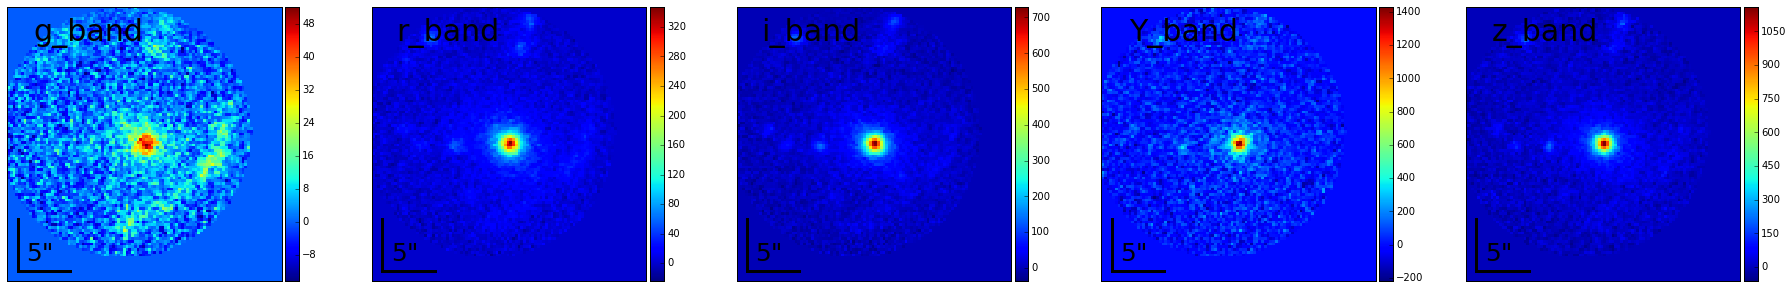

modeled images


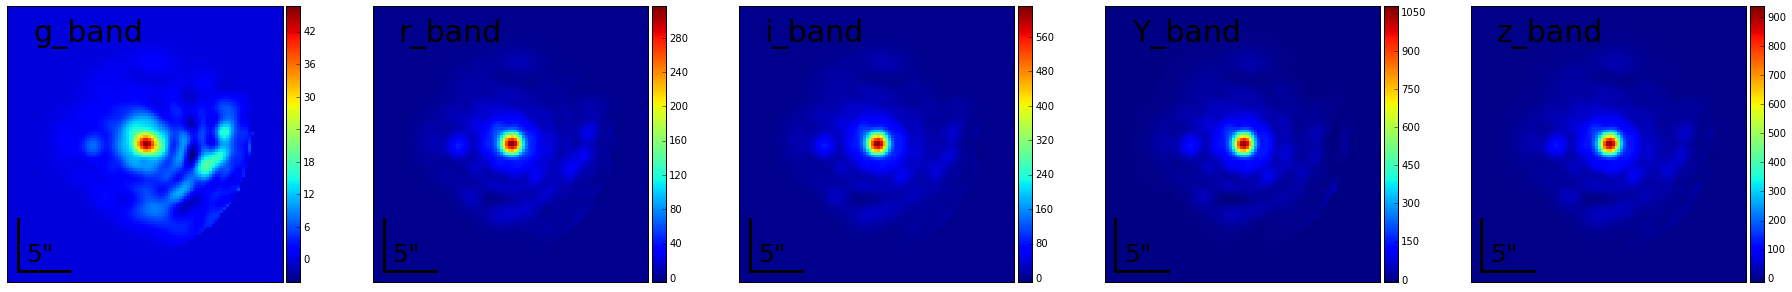

residual images


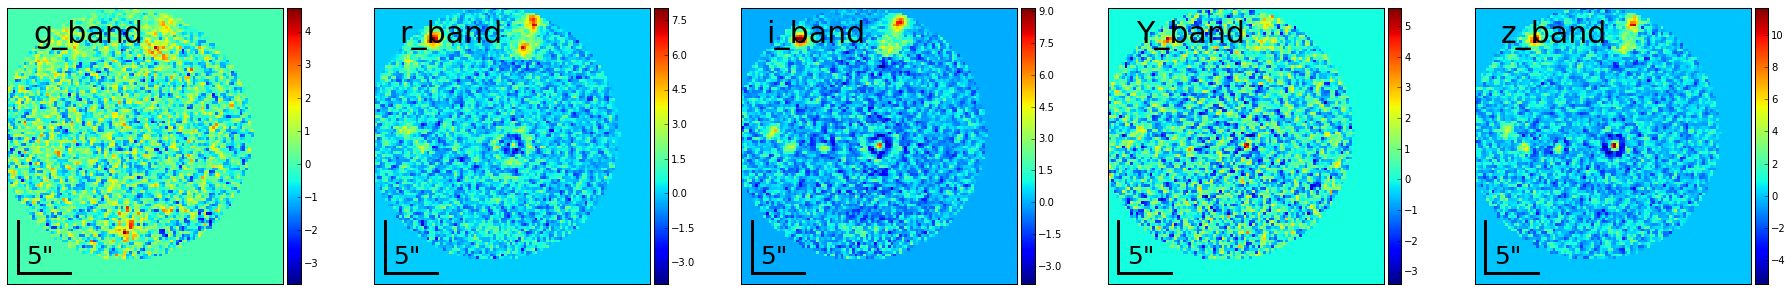

de-convolved images


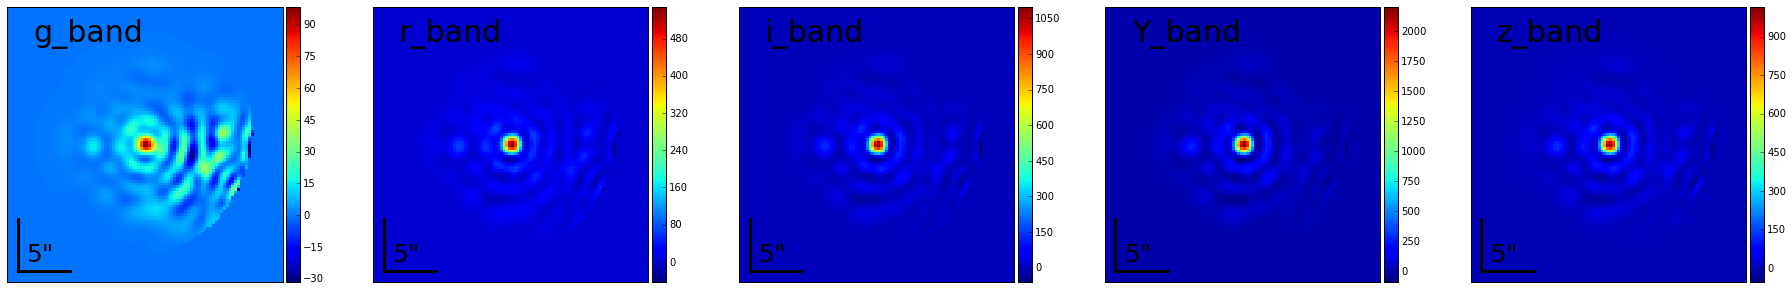

sources


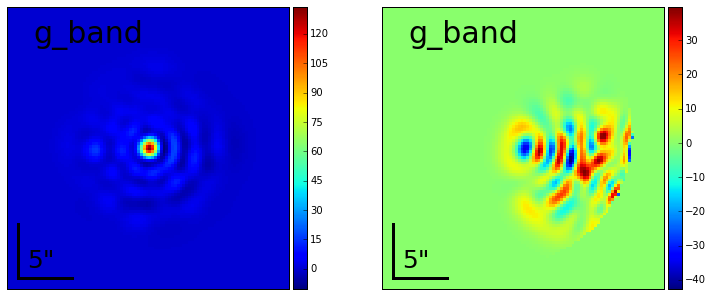

In [11]:
data_list = easyLens.get_data_list()
model_list = easyLens.get_model_images(model_array)
residual_list = easyLens.get_residuals(model_array)
de_convolved_list = easyLens.get_deconvolved(param_array)
source_list_g = easyLens.get_sources_original(param_array, "g_band")
frame_list = easyLens.frame_list

numPix = easyLens.get_pixels_unmasked()
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2

# original images
print("original images")
f, axes = showLens.show_list(data_list, frame_list)
plt.show()


# modeled images
print("modeled images")
f, axes = showLens.show_list(model_list, frame_list)
plt.show()

# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
plt.show()

# de-convolved images
print("de-convolved images")
f, axes = showLens.show_list(de_convolved_list, frame_list)
plt.show()

# sources separate
print("sources")
f, axes = showLens.show_list(source_list_g, ["g_band", "g_band"])
plt.show()

## joint and lensed fit

In [12]:
beta = 1.5
n_max = 5
source1 = Source(name="source1", ra_pos=0, dec_pos=0, beta=beta, n_max=n_max, w_SED=w_SED1, lens_bool=False)
source2 = Source(name="source2", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=0.6, n_max=5, w_SED=w_SED2, lens_bool=True)
easyLens.add_source(source1, over_write=True)
easyLens.add_source(source2, over_write=True)
easyLens.update_mask(kwargs_mask)
update = False
if update is True:
    kwargs_lens = {"phi_E_sis": np.mean(samples[:,0]), "center_x_sis": np.mean(samples[:,1]), "center_y_sis": np.mean(samples[:,2])}
    print kwargs_lens
#kwargs_lens = {"phi_E_sis": 4.7, "center_x_sis": -0.55, "center_y_sis": -0.3}
else:
    kwargs_lens = {"phi_E_sis": 5.6, "center_x_sis": 0.7, "center_y_sis": 1.7}
easyLens.add_lens(kwargs_lens)

source with name source1 deleted
source with name source1 added
source with name source2 deleted
source with name source2 added
lens model parameters added


In [13]:
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()
A = easyLens.get_response()
param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

1.63422956873
original images


/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:305: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  source_image = source.get_lensed_unconvolved(param_array[num:num+numParam], ra_grid, dec_grid, frame, self._kwargs_lens, mask=mask)
/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:325: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  source_image = source.get_response_single(ra_grid, dec_grid, psf_kwargs, numPix, deltaPix, self.subgrid_res, param=param_array[num:num+numParam], mask=mask, kwargs_lens=self._kwargs_lens)


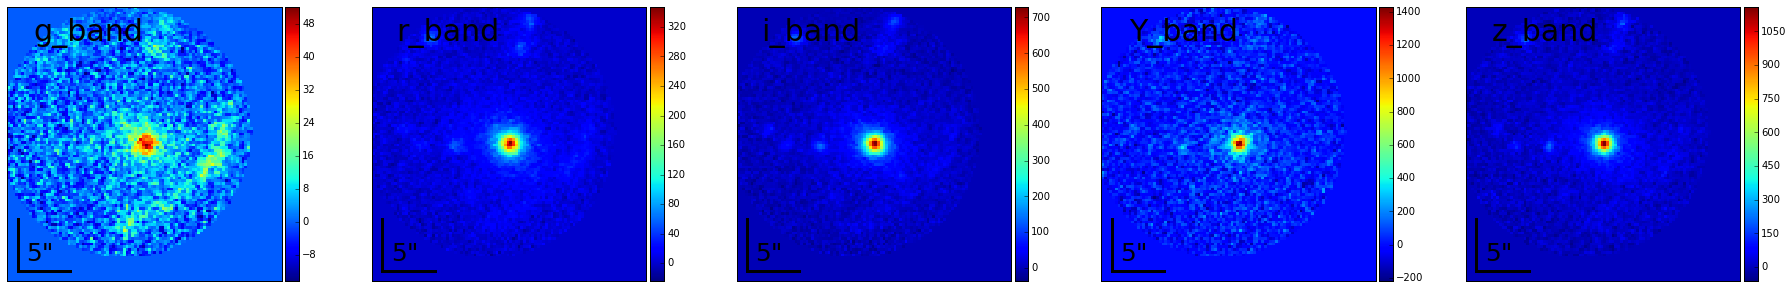

modeled images


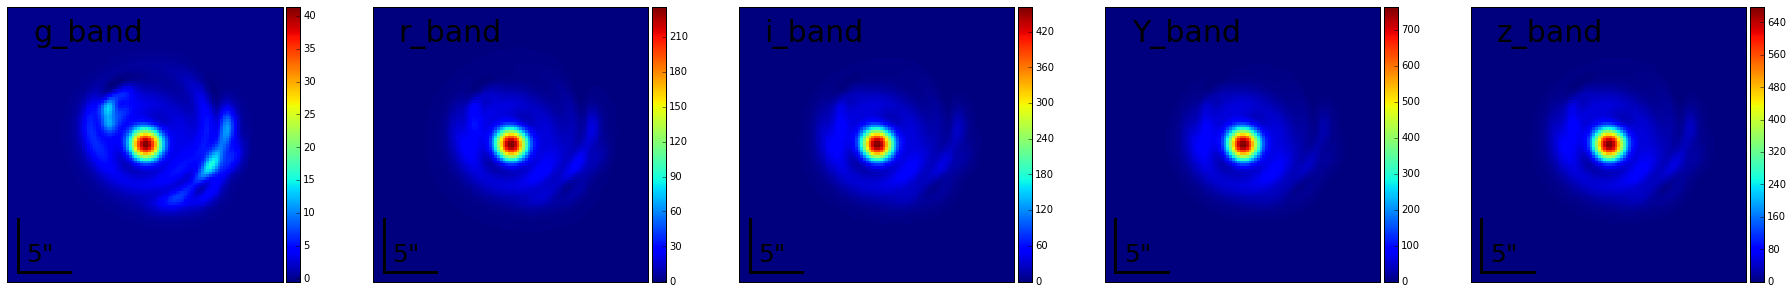

residual images


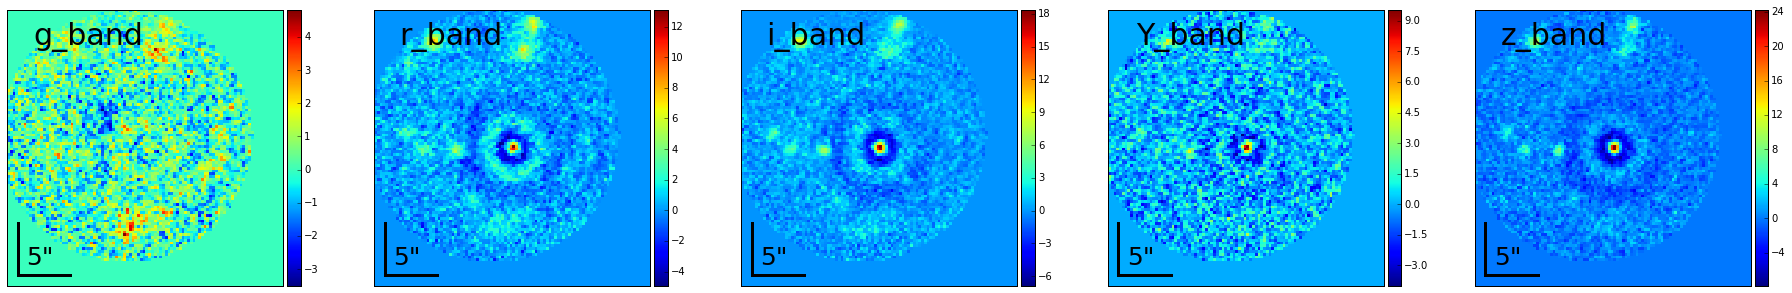

de-convolved images


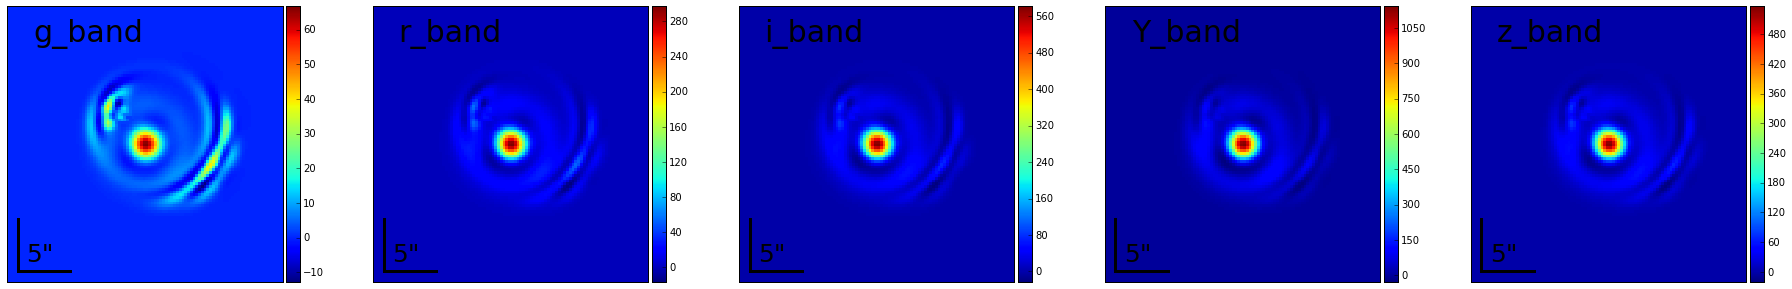

sources original


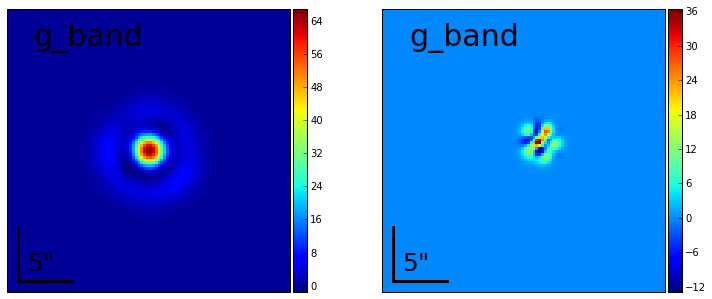

sources lensed


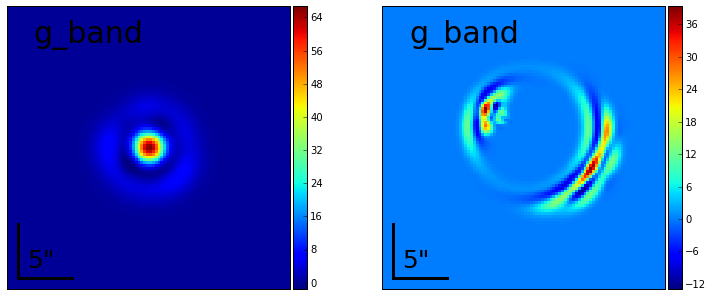

sources lensed and convolved


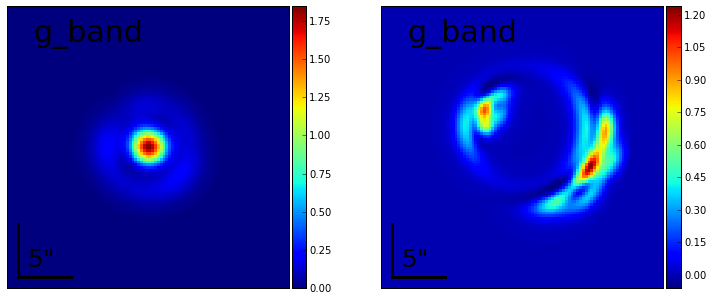

In [14]:
save_image = False
data_list = easyLens.get_data_list()
model_list = easyLens.get_model_images(model_array)
residual_list = easyLens.get_residuals(model_array)
de_convolved_list = easyLens.get_deconvolved(param_array)
source_list_original_g = easyLens.get_sources_original(param_array, "g_band")
source_list_lensed_g = easyLens.get_sources_lensed(param_array, "g_band")
source_list_image_g = easyLens.get_sources_image(param_array, "g_band")
frame_list = easyLens.frame_list

numPix = easyLens.get_pixels_unmasked()
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2

# original images
print("original images")
f, axes = showLens.show_list(data_list, frame_list)
if save_image is True:
    plt.savefig('original_images.pdf', format='pdf')
plt.show()


# modeled images
print("modeled images")
f, axes = showLens.show_list(model_list, frame_list)
if save_image is True:
    plt.savefig('modeled_images.pdf', format='pdf')
plt.show()

# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
if save_image is True:
    plt.savefig('residual_images.pdf', format='pdf')
plt.show()

# de-convolved images
print("de-convolved images")
f, axes = showLens.show_list(de_convolved_list, frame_list)
if save_image is True:
    plt.savefig('de_convolved_images.pdf', format='pdf')
plt.show()

# sources separate
print("sources original")
f, axes = showLens.show_list(source_list_original_g, ["g_band", "g_band"])
if save_image is True:
    plt.savefig('original_objects.pdf', format='pdf')
plt.show()


print("sources lensed")
f, axes = showLens.show_list(source_list_lensed_g, ["g_band", "g_band"])
if save_image is True:
    plt.savefig('lensed_objects.pdf', format='pdf')
plt.show()

print("sources lensed and convolved")
f, axes = showLens.show_list(source_list_image_g, ["g_band", "g_band"])
if save_image is True:
    plt.savefig('lensed_convolved_objects.pdf', format='pdf')
plt.show()

In [15]:
from easylens.Fitting.mcmc import MCMC_sampler
sampler = MCMC_sampler(easyLens, fix_center=False)
walkerRatio = 6
n_run = 10
n_burn = 10
mean_start = [5, 0, 0]
sigma_start = [2, 1, 1]
lowerLimit = [0, -10, -10]
upperLimit = [100, 10, 10]
samples = sampler.mcmc_CH(walkerRatio, n_run, n_burn, mean_start, sigma_start, lowerLimit, upperLimit, threadCount=1, init_pos=None, mpi_monch=False)

INFO:cosmoHammer:Using CosmoHammer 0.5.0
INFO:cosmoHammer:Using emcee 2.1.0
INFO:cosmoHammer:Sampler: <class 'cosmoHammer.CosmoHammerSampler.CosmoHammerSampler'>
configuration: 
  Params: [5 0 0]
  Burnin iterations: 10
  Samples iterations: 10
  Walkers ratio: 6
  Reusing burn in: False
  init pos generator: SampleBallPositionGenerator
  stop criteria: IterationStopCriteriaStrategy
  storage util: InMemoryStorageUtil
likelihoodComputationChain: 
Core Modules: 
  
Likelihood Modules: 
  MCMC_chain

INFO:cosmoHammer:start burn in
INFO:cosmoHammer:Iteration finished:10
INFO:cosmoHammer:storing random state
INFO:cosmoHammer:burn in sampling done! Took: 50.1047s
INFO:cosmoHammer:Mean acceptance fraction for burn in:0.35
INFO:cosmoHammer:Reseting emcee sampler
INFO:cosmoHammer:start sampling after burn in
INFO:cosmoHammer:Iteration finished:10
INFO:cosmoHammer:sampling done! Took: 44.8928s
INFO:cosmoHammer:Mean acceptance fraction:0.2389


InMemoryStorageUtil does not support storeRandomState


/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


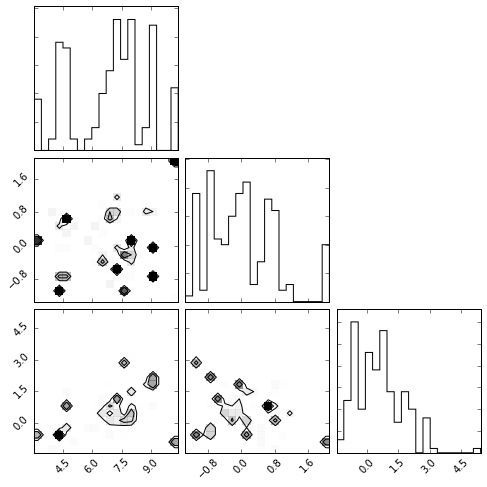

In [16]:
import corner

corner.corner(samples)
plt.show()